# Color Threshold, Blue Screen

## OpenCV

[OpenCV](http://opencv.org/) is a popular computer vision library that has many built-in tools for image analysis and understanding!

Note: In the example above and in later examples, I'm using my own Jupyter notebook and sets of images stored on my personal computer. You're encouraged to set up a similar environment and use images of your own to practice! You'll also be given some code quizzes (coming up next), with images provided, to practice these techniques.

**Import resources**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [20]:
image = cv2.imread('images/pizza_blue.jpg')

image = image[0:700, 0:1200]

print('Type of image', type(image), 
     ' with dimensions:', image.shape)

Type of image <class 'numpy.ndarray'>  with dimensions: (700, 1200, 3)


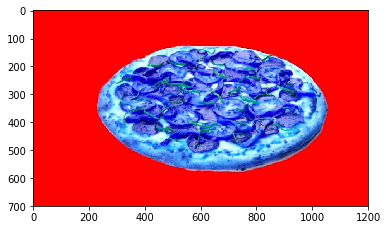

In [21]:
%matplotlib inline

plt.imshow(image)

** Why BGR instead of RGB? **

OpenCV reads in images in BGR format (instead of RGB) because when OpenCV was first being developed, BGR color format was popular among camera manufacturers and image software providers. The red channel was considered one of the least important color channels, so was listed last, and many bitmaps use BGR format for image storage. However, now the standard has changed and most image software and cameras use RGB format, which is why, in these examples, it's good practice to initially convert BGR images to RGB before analyzing or manipulating them.

** Changing Color Spaces **

To change color spaces, we used OpenCV's `cvtColor` function, whose documentation is [here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html).

** Color Selection **

To select the most accurate color boundaries, it's often useful to use a [color picker](https://www.w3schools.com/colors/colors_picker.asp) and choose the color boundaries that define the region you want to select!

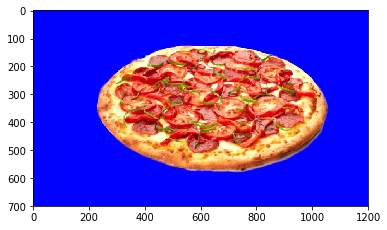

In [22]:
image_copy = np.copy(image)

# change color to RGB from BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Define the color threshold

In [23]:
# define color selection boundaries in RGB values
lower_blue = np.array([0, 0, 230])
upper_blue = np.array([50, 50, 255])

## Create a mask

* **Masks** are a very common way to isolate a selected area of interest and do something with that area

In [24]:
# define the masked area

# the inRange function is asking if the color value of each image pixel falls in the range of the lower 
# and upper color thresholds. 
# If the pixel does fall in this range, the mask will allow it to be displayed and 
# if not, the mask will block pixel out and turn it into black
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
mask.shape

(700, 1200)

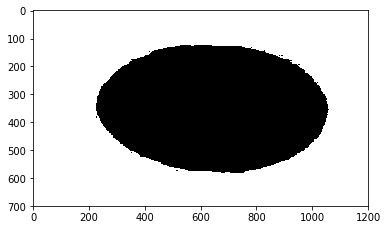

In [25]:
plt.imshow(mask, cmap='gray')

** Create a color mask** 

In this example, it will be up to you to create a color threshold of your own and use it to mask the red portion of a stop sign.

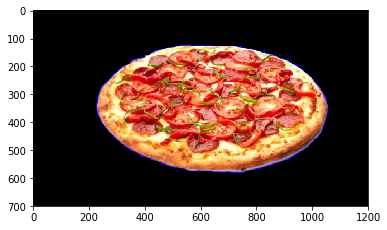

In [26]:
# mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask!=0] = [0,0,0]

plt.imshow(masked_image)

**Mask and add a backgroud image**

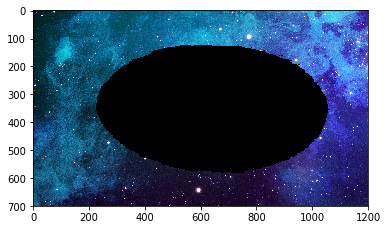

In [33]:
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = background_image[0:700, 0:1200]

crop_background[mask==0] = [0,0,0]

plt.imshow(crop_background)

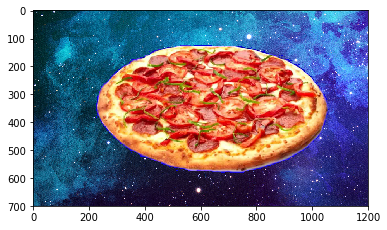

In [34]:
final_image = masked_image + crop_background

plt.imshow(final_image)

## Create a color mask

In this example, you will create a color threshold and use it to mask the red portion of a stop sign.

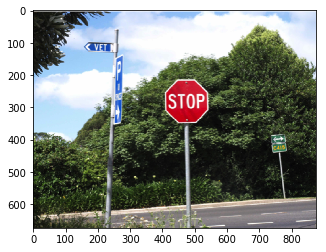

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read in the image
image = cv2.imread('images/stop_sign.png')
# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

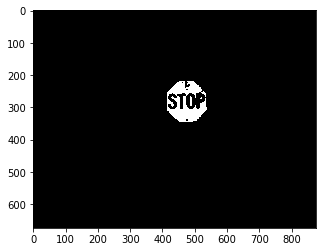

In [62]:

## TODO: Define the color selection criteria
lower_red = np.array([120,0,0]) 
upper_red = np.array([255,52, 52])

# Mask the image 
masked_image = np.copy(image)
mask = cv2.inRange(masked_image, lower_red, upper_red)

plt.imshow(mask, cmap='gray')

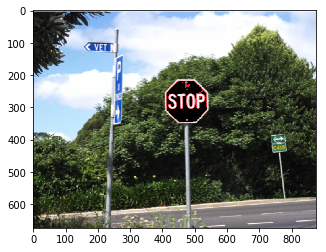

In [63]:
## TODO: Apply the mask to masked_image
## by setting the pixels in the red range to black
## Click `Test Run` to display the output before submitting

masked_image[mask!=0]=[0,0,0]

# ---------------------------------------------------------- #
# Display it
plt.imshow(masked_image)